In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv("./data_pd/tips.csv")
df.head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251


In [4]:
sorted_df = df['tip'].sort_values()

In [6]:
sorted_df.head()

67     1.00
236    1.00
92     1.00
111    1.00
0      1.01
Name: tip, dtype: float64

In [8]:
# Calculate PDF
pdf = sorted_df.value_counts(normalize=True).sort_index()
pdf

tip
1.00     0.016393
1.01     0.004098
1.10     0.004098
1.17     0.004098
1.25     0.012295
           ...   
6.70     0.004098
6.73     0.004098
7.58     0.004098
9.00     0.004098
10.00    0.004098
Name: proportion, Length: 123, dtype: float64

In [9]:
# Calculate CDF
cdf = pdf.cumsum()
cdf

tip
1.00     0.016393
1.01     0.020492
1.10     0.024590
1.17     0.028689
1.25     0.040984
           ...   
6.70     0.983607
6.73     0.987705
7.58     0.991803
9.00     0.995902
10.00    1.000000
Name: proportion, Length: 123, dtype: float64

In [10]:
# PDF between tip = 2 and tip = 3
pdf_2_to_3 = pdf.loc[2:3].sum()

In [11]:
# CDF at tip = 2 and tip = 3
cdf_at_2 = cdf.loc[2]
cdf_at_3 = cdf.loc[3]

In [12]:
# print results 
print(f"PDF between tip = 2 and tip = 3 : {pdf_2_to_3}")
print(f"CDF at tip = 2: {cdf_at_2}")
print(f"CDF at tip = 3: {cdf_at_3}")

PDF between tip = 2 and tip = 3 : 0.41393442622950827
CDF at tip = 2: 0.3196721311475411
CDF at tip = 3: 0.598360655737705


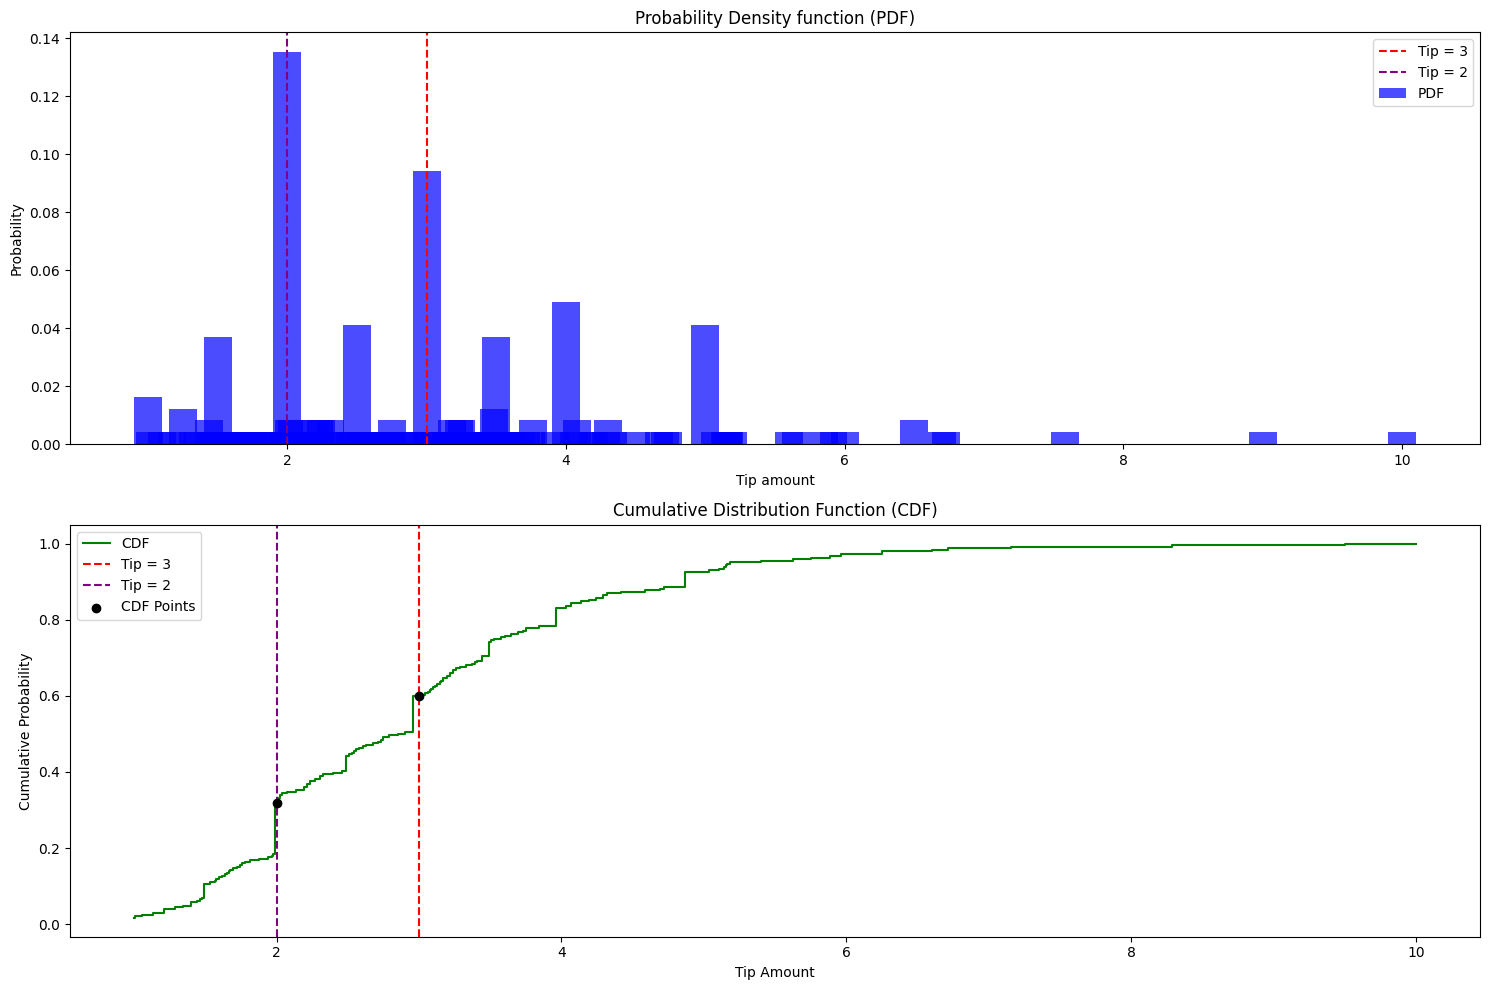

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.bar(pdf.index, pdf.values, width=0.2, alpha=0.7, color='blue', label='PDF')
plt.axvline(x=3, color='red', linestyle='--', label='Tip = 3')
plt.axvline(x=2, color='purple', linestyle='--', label='Tip = 2')
plt.title("Probability Density function (PDF)")
plt.xlabel("Tip amount")
plt.ylabel("Probability")
plt.legend()

plt.subplot(2,1,2)
plt.step(cdf.index, cdf.values, where='mid', color = 'green', label='CDF')
plt.axvline(x=3, color='red', linestyle='--', label='Tip = 3')
plt.axvline(x=2, color='purple', linestyle='--', label='Tip = 2')
plt.scatter([2,3], [cdf_at_2, cdf_at_3], color='black', zorder=5, label='CDF Points')
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Tip Amount")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.tight_layout()
plt.show()
